In [124]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


<font size="6"> Data Description: 


In [125]:
url <- "https://raw.githubusercontent.com/YellowCoco27/player-and-sessions/refs/heads/main/players.csv"
player_data <- read_csv("https://raw.githubusercontent.com/YellowCoco27/player-and-sessions/refs/heads/main/players.csv") 

player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [126]:
summary(player_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

<font size="5"> player_data description:

players.csv contains 196 observations and 7 variables. Highlights from the summary statistics below include a mean of 5.8 hours played, and 144 subscribed and 52 not subscribed. Issues seen in the data include, multitude of 0 hours played in played_hours column and 2 missing values in the age column. Potential issues not visible include, overrepresented data in gender, age, etc which could cause issues in the future for predictions. Data was sourced from Github.

- Experience (chr) - Prior Minecraft Experience level.
- Subscribe (lgl) - Whether they are subscribed to notifications.
- hashedEmail (chr) - Long text, probably linked to email used.
- played_hours (dbl) - Hours played.
- name (chr) - Player name.
- gender (chr)- Player gender.
- Age (dbl) - Player age.

In [127]:
url <- "https://raw.githubusercontent.com/YellowCoco27/player-and-sessions/refs/heads/main/sessions.csv"
session_data <- read_csv("https://raw.githubusercontent.com/YellowCoco27/player-and-sessions/refs/heads/main/sessions.csv") 

session_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [128]:
summary(session_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

<font size="5"> session_data description:

session_data contains 1535 observations, and 5 variables. Potential visual issues include 2 missing values for end_time and original_end_time. Issues not seen in the data could be start_time and end_time including time lagged out or loading, which could skew results. Data was sourced from Github.

- hashedEmail (chr) - Long text, probably linked to email used.
- start_time (chr) - Session start time.
- end_time (chr) - Session end time. 
- original_start_time (dbl) - Likely an alternative start time format.
- original_end_time (dbl) - Likely an alternative end time format.

<font size="6"> Questions:

Broad Question that will be addressed is 
- " What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types."

While my specific question is
- " Can experience determine whether a player is subscribed?"
Using data to associate possible connections between gender and subscription, I plan to wrangle my data in a tidy format splitting experience and subscribe into factor and logical variables respectively. 

<font size="6"> Exploratory Data Analysis and Visualization:

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe
<fct>,<lgl>
Pro,TRUE
Veteran,TRUE
Veteran,FALSE
⋮,⋮
Amateur,FALSE
Amateur,FALSE
Pro,TRUE


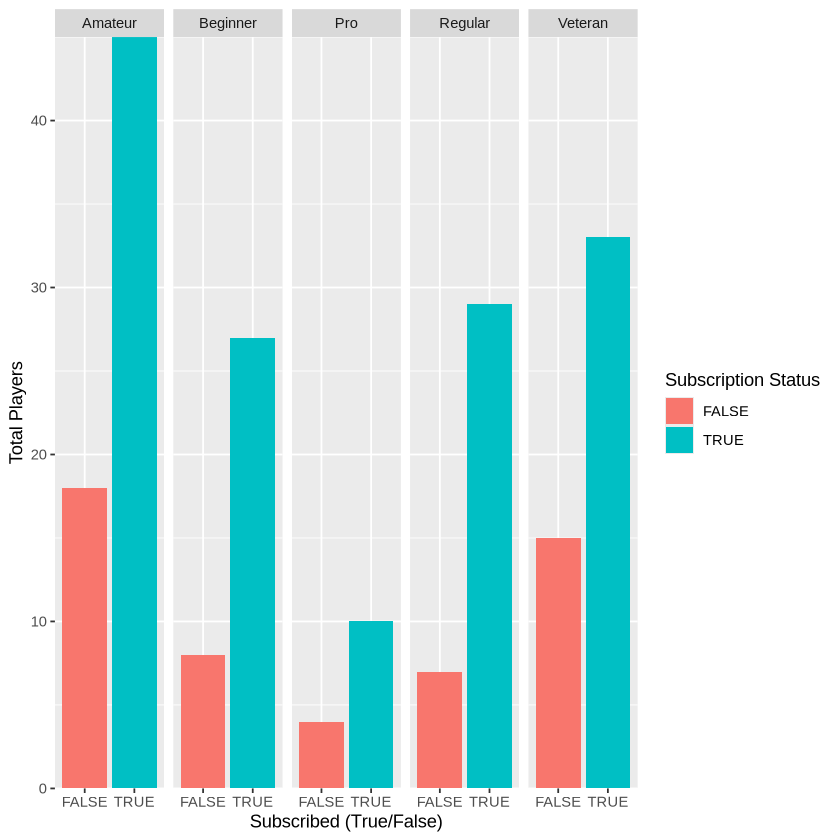

In [129]:
players <- read_csv("https://raw.githubusercontent.com/YellowCoco27/player-and-sessions/refs/heads/main/players.csv")

experience_subscribed_amount <- players |>
    group_by(experience, subscribe) |>
    summarise(total = n()) 

experience_subscribed_plot <- experience_subscribed_amount |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))

experience_subscribed_amount
experience_subscribed_plot

- All experience levels had more subscribed than unsubscribed.
- Amatuer had the highest level of subscribing to not subscribed ratio, possibly due to being intrigued with a game they haven't played much before.
- Second closest in both unsubscribed and subscribed results was veteran, likely due to the fact they are either still interested in the game after lots of experience, or don't care that much about the updates that come from subscribing.

In [130]:
mean_values <- players |>
    select(where(is.numeric)) |> 
    map_df(~mean(.x, na.rm = TRUE))

mean_values

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


The mean of the quantitative values in the data set are 5.8 hours played and an average age of 20.5 years old.

<font size="6"> Methods and Plan:

- For the method I plan to use KNN classification to predict whether a player would subscribe based on their experience level. This method is appropriate as it's easy to implement and can handle multi-class classification problems.
- Assumption that the data is standardized.
- Possible weaknesses of the KNN algorithm are getting slower as training data gets larger, inaccuracy when there is an imbalance of classes and the need of a scatterplot graph for maximum accuracy.
- There will be two splits, training and testing before fitting the model to ensure model is tested correctly.(75% for training, 25% for testing).
- 5-fold cross validation will also be used to make sure an accurate K value is chosen.